In [79]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sn
from sklearn.cluster import KMeans # the clustering algorithm
from sklearn.decomposition import PCA #dimentional reduction algorithm


In [80]:
df = pd.read_csv("servo.data") 
df.to_csv('servo.data',index = None)   # read  the data set

In [102]:
df.head()
df

,motor,screw,pgain,vgain,class
0,4,4,2,3,3
1,1,3,3,4,10
2,3,3,1,2,5
3,1,0,0,1,47
4,3,1,3,4,5
...,...,...,...,...,...
162,1,2,0,1,43
163,1,4,0,0,39
164,2,3,1,2,24
165,0,1,0,1,43


<AxesSubplot:>

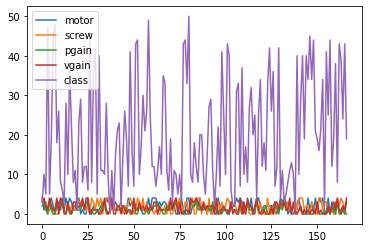

In [101]:
df.plot()   #plot the data

In [82]:
df.isnull().sum()

motor    0
screw    0
pgain    0
vgain    0
class    0
dtype: int64

In [83]:
from sklearn import preprocessing 
   
label_encoder = preprocessing.LabelEncoder() 

df=df.apply(label_encoder.fit_transform)

# label encoding

In [84]:
df.head()

,motor,screw,pgain,vgain,class
0,4,4,2,3,3
1,1,3,3,4,10
2,3,3,1,2,5
3,1,0,0,1,47
4,3,1,3,4,5


In [85]:
from sklearn.preprocessing import StandardScaler
dfs = StandardScaler().fit_transform(df) # normalizing the data 


In [86]:
X = df.drop(['class'], axis='columns', inplace=False)
y = df['class']  

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)  #split the data

In [88]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
yp=reg.predict(X_test)
print(yp)

# apply reg model.

[15.75274941 13.72699798 25.28782863 36.41398637 31.46708069 11.57695067
 36.42752442 27.34014661 29.36589805 14.88391315 17.90279672 15.70388475
 12.13591944 14.56050762 26.87890716 24.91555843 18.6874417  38.90097726
 14.06394155  6.16880554 30.68243571 39.72094886 11.3024098   9.10349783
 15.71742279 23.63434738 21.93200148 19.5074133   5.36237198 28.20898287
 31.51594535 12.41046031 14.59583424 13.24396995 17.03396046 25.23896396
 21.60859595 38.06746762 33.49283213 21.48430008 22.76551112 -7.71888396]


In [89]:
r2_score(y_test,yp)
# print the r2 score of the model

0.6866734572400088

In [90]:
sqrt(mean_squared_error(y_test, yp))  

# print the mean square error of our reg model

7.278350676562778

In [91]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(dfs)
principalComponents.shape

# apply pca algorithm


(167, 5)

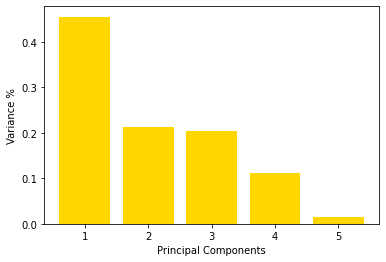

In [92]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

PCA_components = pd.DataFrame(principalComponents)


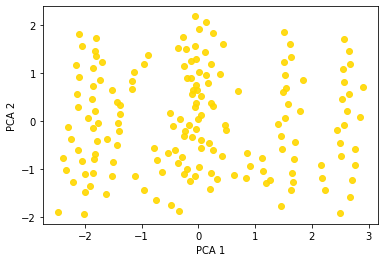

In [93]:
plt.scatter(PCA_components[0],PCA_components[1], alpha=.9, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [94]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(dfs)
X_pca.shape
#  apply dimension reduction

(167, 4)

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.25,random_state=1) # split the data afte the dimension reduction

In [96]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
yp=reg.predict(X_test)
print(yp)

# fit the model

[13.83526926  7.24425636 19.85784761 36.55401707 34.59316715  6.95154094
 44.07598994 28.60299478 26.66105465 10.99796866 11.56809877  7.8219415
  1.69043707  2.20395374 32.23802932 31.50265932  7.34083081 44.62976724
 10.76081461 11.18561148 32.84736799 43.16033069  0.75767257  4.69117303
 11.07743786 17.83463375 20.03763577  6.72468957  9.08418196 22.90734235
 38.8999043  10.44419135 13.49473817 10.52366055  3.61102635 24.08406349
 16.36339267 43.69700274 30.94463642 20.10180425 24.38358148  4.96538725]


In [97]:
r2_score(y_test,yp) 
# print the r2 score after pca applying 

0.988906030559591

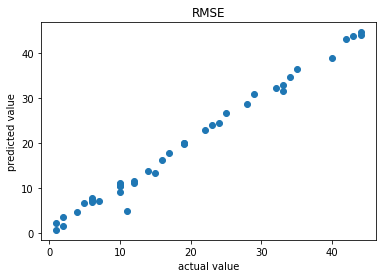

In [98]:
plt.plot(y_test,yp,'o')
plt.title('RMSE')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

# plot the root mean square error